In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# linear modelling
import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [2]:
# data
filePath = "../data/aac_intakes_outcomes_new.csv"
fullData = pd.read_csv(filePath)

In [3]:
fullData.head()

,animal_id,animal_type,breed,age_upon_outcome,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,sex_upon_intake,age_upon_intake_(days),age_upon_intake_(years),age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,time_in_shelter_days
0,A006100,Dog,Spinone Italiano Mix,10 years,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",12/7/2017 14:07,...,Neutered Male,3650,10.0,"(7.5, 10.0]",12/7/2017 0:00,12,2017,2017-12,Thursday,0.588194
1,A006100,Dog,Spinone Italiano Mix,7 years,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",12/20/2014 16:35,...,Neutered Male,2555,7.0,"(5.0, 7.5]",12/19/2014 10:21,12,2014,2014-12,Friday,1.259722
2,A006100,Dog,Spinone Italiano Mix,6 years,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",3/8/2014 17:10,...,Neutered Male,2190,6.0,"(5.0, 7.5]",3/7/2014 14:26,3,2014,2014-03,Friday,1.113889
3,A047759,Dog,Dachshund,10 years,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",4/7/2014 15:12,...,Neutered Male,3650,10.0,"(7.5, 10.0]",4/2/2014 15:55,4,2014,2014-04,Wednesday,4.970139
4,A134067,Dog,Shetland Sheepdog,16 years,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",11/16/2013 11:54,...,Neutered Male,5840,16.0,"(15.0, 17.5]",11/16/2013 9:02,11,2013,2013-11,Saturday,0.119444


In [4]:
print(fullData.columns)

Index(['animal_id', 'animal_type', 'breed', 'age_upon_outcome', 'outcome_type',
       'sex_upon_outcome', 'age_upon_outcome_(days)',
       'age_upon_outcome_(years)', 'age_upon_outcome_age_group',
       'outcome_datetime', 'outcome_month', 'outcome_year',
       'outcome_monthyear', 'outcome_weekday', 'date_of_birth', 'dob_year',
       'dob_month', 'dob_monthyear', 'age_upon_intake', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday',
       'time_in_shelter_days'],
      dtype='object')


In [5]:
fullData['intake_type'].value_counts()

Stray                 55935
Owner Surrender       15028
Public Assist          4994
Wildlife               3464
Euthanasia Request      251
Name: intake_type, dtype: int64

In [6]:
mask = (fullData.animal_type == "Dog") | (fullData.animal_type == "Cat") 
tempData = fullData.loc[mask]

mask2 = tempData.intake_type != "Euthanasia Request"
tempData2 = tempData.loc[mask2]

mask3 = (tempData2.intake_year != 2013) & (tempData2.intake_year != 2018)
cleanData = tempData2.loc[mask3]


In [7]:
mask_2017 = cleanData.intake_year == 2017
temp2017 = cleanData.loc[mask_2017]
mask_dog = temp2017.animal_type == "Dog"
clean2017 = temp2017.loc[mask_dog]
clean2017.animal_type.value_counts()

Dog    9846
Name: animal_type, dtype: int64

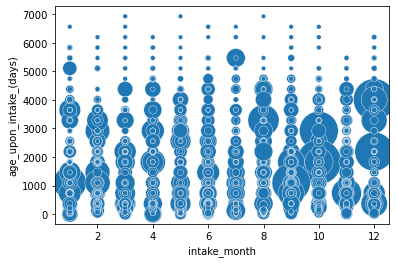

In [8]:
# use the scatterplot function to build the bubble map
sns.scatterplot(data=clean2017, x=clean2017['intake_month'], y=clean2017['age_upon_intake_(days)'], size=clean2017['time_in_shelter_days'], legend=False, sizes=(20, 2000))

# show the graph
plt.show()

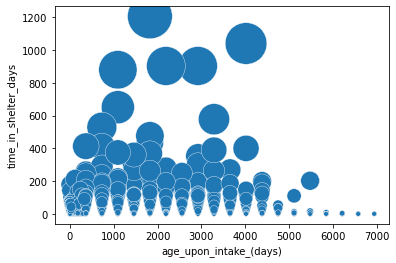

In [9]:
sns.scatterplot(data=clean2017, y=clean2017['time_in_shelter_days'], x=clean2017['age_upon_intake_(days)'], size=clean2017['time_in_shelter_days'], legend=False, sizes=(20, 2000))

# show the graph
plt.show()

In [10]:
clean2017.outcome_type.value_counts()

Adoption           4611
Return to Owner    2848
Transfer           2152
Rto-Adopt           113
Euthanasia           91
Died                 23
Disposal              5
Missing               3
Name: outcome_type, dtype: int64

In [11]:
clean2017.groupby(['intake_type','outcome_type'])['time_in_shelter_days'].mean()

intake_type      outcome_type   
Owner Surrender  Adoption           20.518008
                 Died                3.967535
                 Euthanasia         13.724210
                 Return to Owner    35.038302
                 Rto-Adopt          26.530916
                 Transfer           10.223249
Public Assist    Adoption           36.811070
                 Died                4.126389
                 Euthanasia         46.246219
                 Missing            53.517361
                 Return to Owner     8.468479
                 Rto-Adopt          47.068924
                 Transfer           28.043598
Stray            Adoption           18.129549
                 Died                8.756380
                 Disposal            9.070972
                 Euthanasia          4.650825
                 Missing             2.949653
                 Return to Owner     3.849434
                 Rto-Adopt           9.012162
                 Transfer            9.775842
N

In [12]:
clean2017.groupby(['intake_type','outcome_type']).size()

intake_type      outcome_type   
Owner Surrender  Adoption           1327
                 Died                  4
                 Euthanasia           29
                 Return to Owner     103
                 Rto-Adopt            27
                 Transfer            616
Public Assist    Adoption             85
                 Died                  3
                 Euthanasia            9
                 Missing               1
                 Return to Owner     709
                 Rto-Adopt             8
                 Transfer            210
Stray            Adoption           3199
                 Died                 16
                 Disposal              5
                 Euthanasia           53
                 Missing               2
                 Return to Owner    2036
                 Rto-Adopt            78
                 Transfer           1326
dtype: int64

In [13]:
clean2017.groupby(['intake_type','intake_month']).size()

intake_type      intake_month
Owner Surrender  1               181
                 2               258
                 3               160
                 4               174
                 5               204
                 6               173
                 7               160
                 8               184
                 9               162
                 10              144
                 11              133
                 12              173
Public Assist    1                46
                 2                71
                 3                79
                 4                72
                 5                78
                 6                78
                 7                56
                 8                81
                 9               271
                 10               66
                 11               58
                 12               69
Stray            1               596
                 2               519
        

In [14]:
clean2017.groupby(['age_upon_intake_(years)'])['time_in_shelter_days'].mean()

age_upon_intake_(years)
0.000000     45.751675
0.002740     53.181855
0.005479     45.548889
0.008219     35.403953
0.010959     48.374074
0.013699      0.244544
0.016438      0.046181
0.019178     25.231849
0.038356      2.666067
0.057534     14.516852
0.076712     31.483397
0.082192      6.986277
0.095890     34.945635
0.164384      5.546426
0.246575      7.343888
0.328767      8.958081
0.410959      6.289157
0.493151      7.455572
0.575342     10.761812
0.657534      9.742945
0.739726      9.855417
0.821918      8.312803
0.904110     12.049036
1.000000     12.590103
2.000000     14.972659
3.000000     17.628851
4.000000     14.653873
5.000000     18.036954
6.000000     16.694513
7.000000     14.421349
8.000000     19.472164
9.000000     21.317921
10.000000    12.415722
11.000000    32.548001
12.000000    21.953722
13.000000     6.554789
14.000000     5.799028
15.000000    10.144805
16.000000     1.523611
17.000000     1.001549
18.000000     0.929861
19.000000     0.797222
Name: time

In [15]:
clean2017.groupby("breed")['time_in_shelter_days'].mean()

breed
Afghan Hound/Labrador Retriever          46.824306
Airedale Terrier Mix                      1.136111
Akbash Mix                               15.538542
Akita                                     3.189583
Akita Mix                                21.688194
                                           ...    
Yorkshire Terrier/Miniature Schnauzer     3.164028
Yorkshire Terrier/Pomeranian              5.027778
Yorkshire Terrier/Shih Tzu                4.219444
Yorkshire Terrier/Standard Poodle         4.824306
Yorkshire Terrier/Yorkshire Terrier       4.981944
Name: time_in_shelter_days, Length: 688, dtype: float64

In [16]:
clean2017.breed.value_counts().head(10)

Pit Bull Mix                 1439
Labrador Retriever Mix       1340
Chihuahua Shorthair Mix      1040
German Shepherd Mix           483
Australian Cattle Dog Mix     226
Boxer Mix                     162
Dachshund Mix                 160
Border Collie Mix             141
Miniature Poodle Mix          140
Yorkshire Terrier Mix         130
Name: breed, dtype: int64